<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2064/Lesson_64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Встановимо бібліотеки та імпортуємо їх

In [1]:
pip install dlib imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from imutils import face_utils

Загрузимо фото

<function matplotlib.pyplot.show(close=None, block=None)>

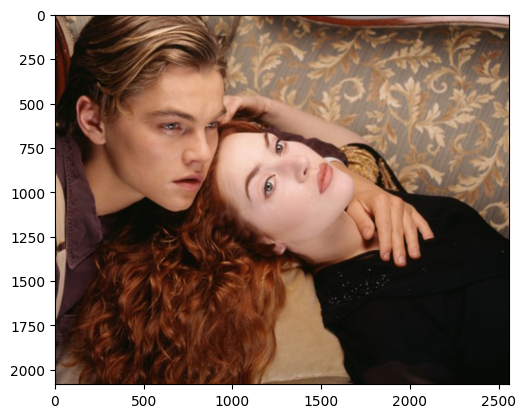

In [6]:
img = cv2.imread("/content/titanic.jpg")
im_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_show)
plt.show

Проведемо розпізнавання

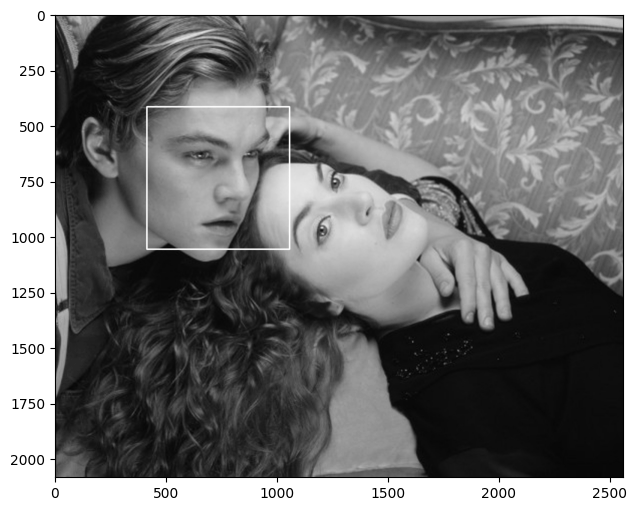

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 0)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 5)
    
plt.figure(figsize=(10,6))
plt.imshow(gray, cmap='gray')
plt.show()

Так як розпізналася лише одна людина, припустимо що це сталося ізза того що дівчина знаходится майже горизонтально на фото, спробуємо перевернути зображення

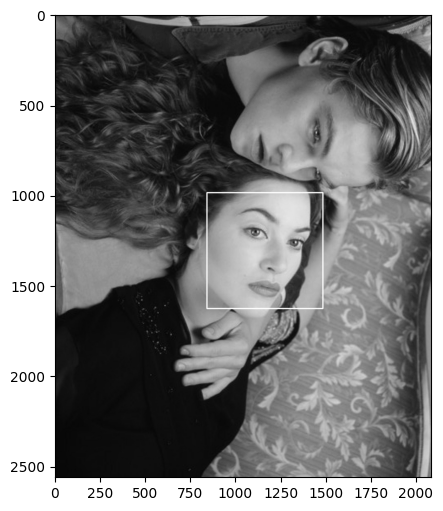

In [5]:
image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 0)

for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 255, 255), 5)
    
plt.figure(figsize=(10,6))
plt.imshow(gray, cmap='gray')
plt.show()

Як бачимо після розвороту фото лице дівчини розпізналося

Спробуємо інший метод

In [8]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

<function matplotlib.pyplot.show(close=None, block=None)>

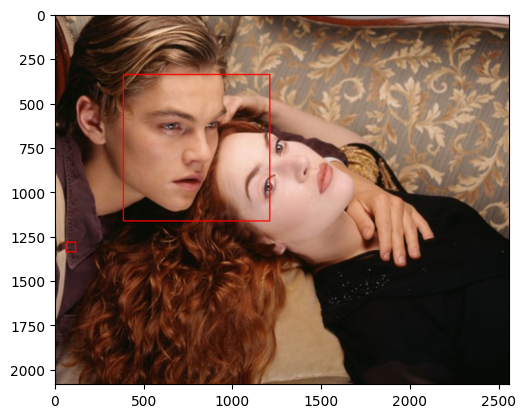

In [10]:
img = cv2.imread("/content/titanic.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
plt.imshow(img)
plt.show

Як бачимо працює так-само але зьявився артефакт який можливо прибрати якщо погратися з параметрами, спробуємо розгорнути фото

<function matplotlib.pyplot.show(close=None, block=None)>

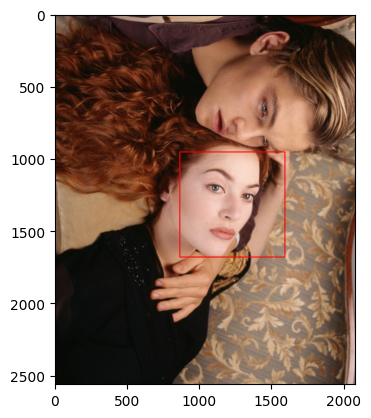

In [11]:
img = cv2.imread("/content/titanic.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)
plt.imshow(img)
plt.show

Як бачимо ця модель також знайшла дівчину при повороті фото